<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [921]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [922]:
original_data = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')
data_frame = original_data.copy()
data_frame.shape

(44744, 12)

2. Выведите несколько первых (последних строк таблицы), чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [923]:
data_frame.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


In [924]:
data_frame.tail()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице

4. Обратите внимание на информацию о числе непустых значений

In [925]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [926]:
data_frame.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 2010 Московский государств...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [927]:
data_frame['Образование'] = data_frame['Образование и ВУЗ'].apply(lambda x: x.split(' образование ')[0])
data_frame = data_frame.drop('Образование и ВУЗ', axis=1)
data_frame['Образование'].unique()


array(['Неоконченное высшее', 'Высшее', 'Среднее специальное', 'Среднее'],
      dtype=object)

In [928]:
data_frame['Ищет работу на должность:'].value_counts()

Системный администратор                                                     3099
Инженер                                                                      966
Аналитик                                                                     809
Менеджер проектов                                                            745
Руководитель проекта                                                         718
                                                                            ... 
Руководитель службы технической поддержки и обучения                           1
Руководитель проектов 1С. Автоматизация бизнес-процессов на предприятии.       1
JavaScript-разработчик                                                         1
Менеджер отдела закупок и логистики                                            1
Контент-менеджер, оператор группы ввода данных Маркета                         1
Name: Ищет работу на должность:, Length: 14929, dtype: int64

2. Теперь нас интересует столбец **"Пол/возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [929]:
import re

data_frame['Пол'] = data_frame['Пол, возраст'].apply(lambda x: 'М' if 'Мужчина' in x else 'Ж')
data_frame['Возраст'] = data_frame['Пол, возраст'].apply(lambda x: int(re.findall('\d{1,}',x)[0]))
data_frame = data_frame.drop('Пол, возраст', axis=1)

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-третьих, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [930]:
def get_experience(val):
    if val is not np.nan:
        splitted = val.split(' ')[:7]
        years = 0
        months = 0
        for index, item in enumerate (splitted):
            if item in ['год', 'года', 'лет']:
                years = int(splitted[index-1])
            if item in ['месяц', 'месяца', 'месяцев']:
                months = int(splitted[index-1])
        return int(years * 12 + months)
    else:
        return None

In [931]:
data_frame['Опыт работы (месяц)'] = data_frame['Опыт работы'].apply(get_experience)
data = data_frame.drop('Опыт работы', axis=1)
print(round(data['Опыт работы (месяц)'].median()))

100


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов миллионников:
    
   <code> million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    
    
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [932]:
million_cities = ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']


def get_business_trip(val):
    business_trip_val = val.split(' , ')[-1]
    if 'не' in business_trip_val:
        return False
    else:
        return True
    
def get_moving(val):
    moving_val = val.split(' , ')[-2]
    if 'не' in moving_val:
        return False
    else:
        return True

In [933]:
data_frame['Город'] = data_frame['Город, переезд, командировки'].apply(lambda x: x.split(",")[0].strip() if x.split(",")[0].strip() in million_cities else 'другие')
data_frame['Готовность к переезду'] =  data_frame['Город, переезд, командировки'].apply(get_moving)
data_frame['Готовность к командировкам'] =  data_frame['Город, переезд, командировки'].apply(get_business_trip)

data_frame = data_frame.drop('Город, переезд, командировки', axis=1)

In [934]:
data_frame.head()

,ЗП,Ищет работу на должность:,Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам
0,29000 руб.,Системный администратор,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0,другие,False,False
1,40000 руб.,Технический писатель,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,М,60,233.0,другие,False,True
2,20000 руб.,Оператор,полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36,123.0,другие,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее,М,38,225.0,другие,False,True
4,140000 руб.,Региональный менеджер по продажам,полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее,Ж,26,67.0,Москва,False,True


In [935]:
len(data_frame[data_frame['Город'] == 'Санкт-Петербург'])/len(data_frame)*100

11.033881637761487

In [936]:
len(data_frame[(data_frame['Готовность к командировкам'] == True) & (data_frame['Готовность к переезду'] == True)])/len(data_frame)*100

31.74503844090828

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [937]:
for i in ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']:
    data_frame[i] = data_frame['Занятость'].apply(lambda x: i in x)
    
for i in ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']:
    data_frame[i] = data_frame['График'].apply(lambda x: i in x)
    
data_frame = data_frame.drop('Занятость', axis=1)
data_frame = data_frame.drop('График', axis=1)

print(len(data_frame[(data_frame['волонтерство'] == True) & (data_frame['проектная работа'] == True)]))
print(len(data_frame[(data_frame['вахтовый метод'] == True) & (data_frame['гибкий график'] == True)]))

436
2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [938]:
data_frame['Обновление резюме'] = pd.to_datetime(data_frame['Обновление резюме']).dt.date

In [939]:
curresy_rate = pd.read_csv('ExchangeRates_Project_1.csv', sep=',')
curresy_rate['date'] = pd.to_datetime(curresy_rate['date']).dt.date
curresy_rate = curresy_rate.drop(['time', 'per', 'vol'], axis=1)

In [940]:
def convert_currency_symbol(val):
    val = val.split(" ")[1]
    if val == 'бел.руб.':
        return 'BYN'
    elif val == 'грн.':
        return 'UAH'
    elif val == 'сум':
        return 'UZS'
    else:
        return val
    
data_frame['currensy_left'] = data_frame['ЗП'].apply(convert_currency_symbol)
data_frame['ЗП'] = data_frame['ЗП'].apply(lambda x: float(x.split(' ')[0]))

In [941]:
data_frame = pd.merge(
    data_frame, 
    curresy_rate, 
    left_on=['Обновление резюме', 'currensy_left'], 
    right_on=['date', 'currency'],
    how='left'
    ).fillna(1)

In [942]:
data_frame['ЗП (руб)'] = data_frame['ЗП'] * data_frame['close'] / data_frame['proportion']
data_frame = data_frame.drop(['proportion', 'close', 'date', 'currency', 'currensy_left', 'ЗП'], axis=1)

In [943]:
data_frame['ЗП (руб)'].median()

59019.0

In [944]:
data_frame['Готовность к переезду']

0        False
1        False
2        False
3        False
4        False
         ...  
44739     True
44740     True
44741     True
44742    False
44743    False
Name: Готовность к переезду, Length: 44744, dtype: bool

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [945]:
print(f"Мода - {data_frame['Возраст'].mode()[0]}")
print(f"Максимальное значение - {data_frame['Возраст'].max()}")
print(f"Минимальное значение - {data_frame['Возраст'].min()}")

Мода - 30
Максимальное значение - 100
Минимальное значение - 14


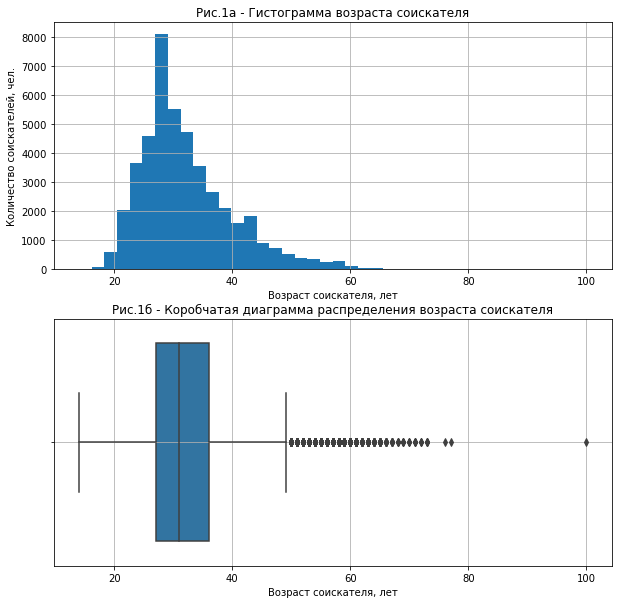

In [946]:
fig_1, axes_1 = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
axes_1[0].hist(x=data_frame['Возраст'], bins=40)
axes_1[0].set_xlabel('Возраст соискателя, лет')
axes_1[0].set_ylabel('Количество соискателей, чел.')
axes_1[0].set_title('Рис.1а - Гистограмма возраста соискателя')
axes_1[0].grid()

boxplot=sns.boxplot(
    data=data_frame,
    x='Возраст')
boxplot.set_title('Рис.1б - Коробчатая диаграмма распределения возраста соискателя')
boxplot.set_xlabel('Возраст соискателя, лет')
boxplot.grid()

1) Мода параметра "Возраст соискателя" равняется 30;
2) Максимальное значение составляет 100 лет, минимальное - 14;
3) Возраст большинства соискателей находится в промежутке значений приблизительно 26-36 лет.

В значениях возраста наблюдаются аномалии. К примеру максимальное значение 100 лет - слишком большое для соискателя, так-же как и 14 лет - слишком маленькое - по закону официально трудоустраиваться возможно только после 18 лет.

Анализируя коробчатую диаграмму (рис. 1б) можно увидеть анамальные значения начиная с 52 лет. Нельзя говорить, что все эти значения ошибочны, или указаны заведомо неверно, для более точного определения необходимо дополнительное исследование.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [947]:
print(f"Мода - {data_frame['Опыт работы (месяц)'].mode()[0]}")
print(f"Максимальное значение - {data_frame['Опыт работы (месяц)'].max()}")
print(f"Минимальное значение - {data_frame['Опыт работы (месяц)'].min()}")

Мода - 81.0
Максимальное значение - 1188.0
Минимальное значение - 0.0


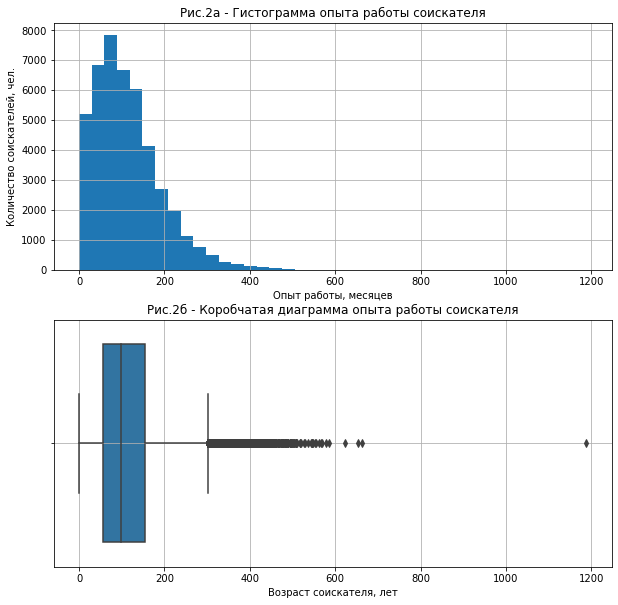

In [948]:
fig_2, axes_2 = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
axes_2[0].hist(x=data_frame['Опыт работы (месяц)'], bins=40)
axes_2[0].set_xlabel('Опыт работы, месяцев')
axes_2[0].set_ylabel('Количество соискателей, чел.')
axes_2[0].set_title('Рис.2а - Гистограмма опыта работы соискателя')
axes_2[0].grid()

boxplot=sns.boxplot(
    data=data_frame,
    x='Опыт работы (месяц)')
boxplot.set_title('Рис.2б - Коробчатая диаграмма опыта работы соискателя')
boxplot.set_xlabel('Возраст соискателя, лет')
boxplot.grid()

1) Мода параметра "Опыт работы (месяц)" равняется 81 месяц;
2) Максимальное значение составляет 1188 месяцев, минимальное - 0;
3) Опыт большинства соискателей находится в промежутке значений приблизительно 50-170 месяцев.

В значениях опыта работы наблюдаются аномалии, например максимальное значение составляет 1188 месяцев (1188 / 12 = 99 лет), так-же к аномалиям можно отнести все значения опыта работы, которые превышают возраст соискателя.

In [949]:
data['опыт превышает возраст'] = data_frame['Опыт работы (месяц)'] / 12 > data_frame['Возраст']
data['опыт превышает возраст'].value_counts()

False    44737
True         7
Name: опыт превышает возраст, dtype: int64

Всего 7 значений превышают возраст соискателя

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [950]:
print(f"Мода - {data_frame['ЗП (руб)'].mode()[0]}")
print(f"Максимальное значение - {data_frame['ЗП (руб)'].max()}")
print(f"Минимальное значение - {data_frame['ЗП (руб)'].min()}")

Мода - 50000.0
Максимальное значение - 24304876.0
Минимальное значение - 1.0


In [951]:
print(f"Число соискателей с желаемой ЗП более 1 млн. руб. - {len(data_frame[data_frame['ЗП (руб)'] > 1000000])} чел.")

Число соискателей с желаемой ЗП более 1 млн. руб. - 5 чел.


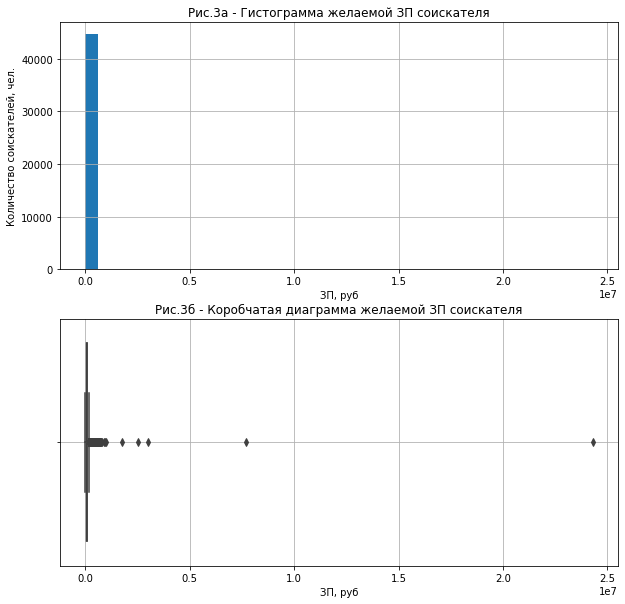

In [952]:
fig_3, axes_3 = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
axes_3[0].hist(x=data_frame['ЗП (руб)'], bins=40)
axes_3[0].set_xlabel('ЗП, руб')
axes_3[0].set_ylabel('Количество соискателей, чел.')
axes_3[0].set_title('Рис.3а - Гистограмма желаемой ЗП соискателя')
axes_3[0].grid()

boxplot=sns.boxplot(
    data=data_frame,
    x='ЗП (руб)')
boxplot.set_title('Рис.3б - Коробчатая диаграмма желаемой ЗП соискателя')
boxplot.set_xlabel('ЗП, руб')
boxplot.grid()

1) Мода параметра "ЗП (руб)" равняется 50000 руб;
2) Максимальное значение составляет 24304876 руб, минимальное - 1;

Исходя из текущей диаграммы невозможно ответить на вопрос "в каком примерном интервале находится заработная плата большинства соискателей". Необходимо удалить аномальные значения.

In [953]:
clean_zp_data = data_frame[data_frame['ЗП (руб)'] < 1000000]

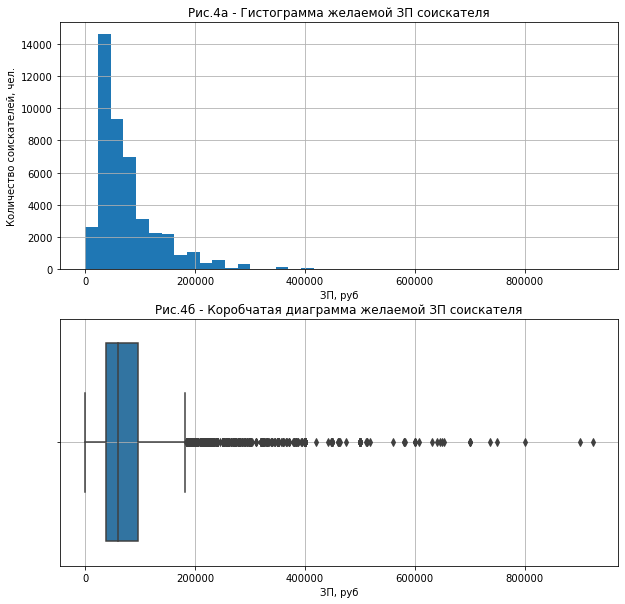

In [954]:
fig_4, axes_4 = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
axes_4[0].hist(x=clean_zp_data['ЗП (руб)'], bins=40)
axes_4[0].set_xlabel('ЗП, руб')
axes_4[0].set_ylabel('Количество соискателей, чел.')
axes_4[0].set_title('Рис.4а - Гистограмма желаемой ЗП соискателя')
axes_4[0].grid()

boxplot=sns.boxplot(
    data=clean_zp_data,
    x='ЗП (руб)')
boxplot.set_title('Рис.4б - Коробчатая диаграмма желаемой ЗП соискателя')
boxplot.set_xlabel('ЗП, руб')
boxplot.grid()

ЗП большинства соискателей находится в промежутке значений приблизительно 30-95 тыс. руб.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [955]:
median_zp_by_eduk = data_frame.groupby('Образование')['ЗП (руб)'].median()

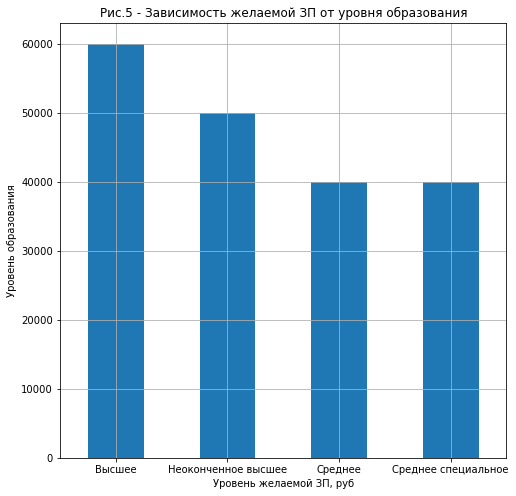

In [956]:
fig_5, axes_5 = plt.subplots(figsize=(8, 8))
median_zp_by_eduk.plot(kind='bar', ax=axes_5)
axes_5.set_title('Рис.5 - Зависимость желаемой ЗП от уровня образования')
axes_5.set_xlabel('Уровень желаемой ЗП, руб')
axes_5.set_ylabel('Уровень образования')
axes_5.tick_params(axis='x', labelrotation = 0)
axes_5.grid()

Максимальный уровень ЗП наблюдается у соискателей с высшим образованием, в то время как минимум - тех, кто имеет среднее и среднее спциальное образование. Наблюдается явная прямая зависимость уровня образования от желаемой ЗП, что вполне логично. При пронозировании стоит учитывать параметр образования.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [957]:
median_zp_by_sity = data_frame.groupby('Город')['ЗП (руб)'].median().sort_values(ascending=False)

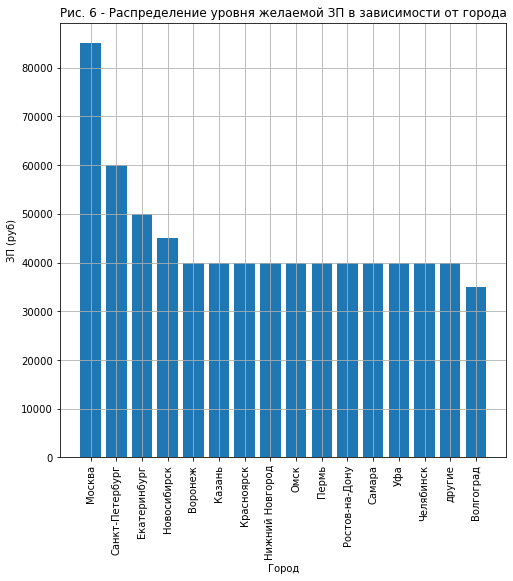

In [958]:
fig_6, axes_6 = plt.subplots(figsize=(8, 8))
axes_6.bar(x=median_zp_by_sity.index, height=median_zp_by_sity.values)
plt.xticks(rotation=90)
axes_6.set_xlabel("Город")
axes_6.set_ylabel("ЗП (руб)")
axes_6.set_title("Рис. 6 - Распределение уровня желаемой ЗП в зависимости от города")
axes_6.grid()


Из рисунка 6 зависимость ЗП от города прослеживается. Глядя на название города, скорее всего, корреляция будет зависеть либо от численности населения города, либо от средней ЗП в данном городе, либо от бюджета города, либо от средней ЗП в регионе. Напрямую использование названия города вряд-ли поможет. А если "привязать" один из перечисленных ранее параметров (население, ср. ЗП, бюджет), то оценка (прогноз) будет более качественная 

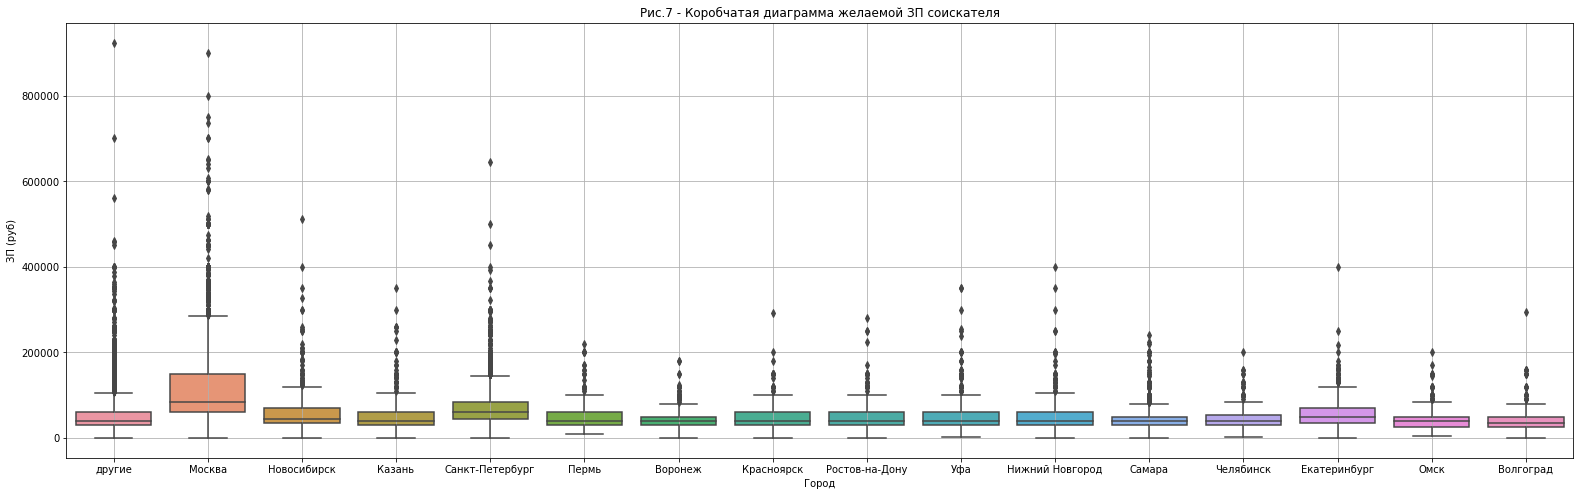

In [959]:
fig_7, axes_7 = plt.subplots(figsize=(27, 8))
boxplot=sns.boxplot(
    data=clean_zp_data,
    x='Город',
    y='ЗП (руб)',
    ax=axes_7
    )
boxplot.set_title('Рис.7 - Коробчатая диаграмма желаемой ЗП соискателя')
boxplot.set_xlabel('Город')
boxplot.grid()

Максимальный желаемый уровень ЗП наблюдается в "других" городах.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [960]:
pivot_zp_businessTrip_moving = data_frame.pivot_table(
    'ЗП (руб)',
    index='Готовность к переезду',
    columns='Готовность к командировкам',
    aggfunc='median'
)
pivot_zp_businessTrip_moving

Готовность к командировкам,False,True
Готовность к переезду,,
False,40000.0,60000.0
True,50000.0,67000.0


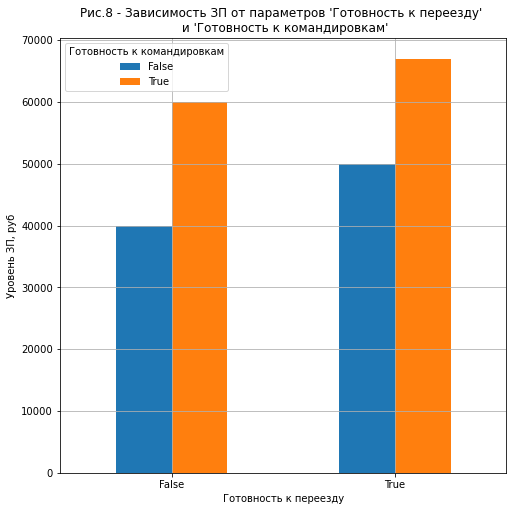

In [961]:
fig_8, axes_8 = plt.subplots(figsize=(8, 8))
pivot_zp_businessTrip_moving.plot(kind='bar', ax=axes_8)
axes_8.set_title("Рис.8 - Зависимость ЗП от параметров 'Готовность к переезду' \n и 'Готовность к командировкам'")
axes_8.set_xlabel('Готовность к переезду')
axes_8.set_ylabel('Уровень ЗП, руб')
axes_8.tick_params(axis='x', labelrotation = 0)
axes_8.grid()

Из рисунка 8 видно, что при готовности изменить свое местоположение (хоть временно, хоть постоянно), ожидаемая ЗП выше, что вполне ожидаемо. При переезде и командировке тратиться личное время и, логично, что соискатель хотел-бы возместить и времЕнные и финансовые затраты. 

При готовности к переезду ожидаемая ЗП выше - логика такая-же, соискатель хотел-бы возместить затраты, связанные с измененим постоянного места жительства.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [962]:
pivot_zp_age_education = data_frame.pivot_table(
    'ЗП (руб)',
    index='Образование',
    columns='Возраст',
    aggfunc='median',
    fill_value=0
)
pivot_zp_age_education

Возраст,14,15,16,17,18,19,20,21,22,23,...,67,68,69,70,71,72,73,76,77,100
Образование,,,,,,,,,,,,,,,,,,,,,
Высшее,60000,0,122582.49,90075.5,30000,30000,30000,35000,40000,45000,...,70000,79000,112500,80000,75000,75000,62500,45000,90000,0
Неоконченное высшее,0,0,0.00,80000.0,25000,30000,31000,35000,40000,40000,...,0,0,0,0,0,0,0,0,0,0
Среднее,0,10000,0.00,44000.0,35000,45000,29000,40000,40000,35000,...,0,0,0,0,0,0,0,0,0,0
Среднее специальное,0,2000,30000.00,25000.0,25151,30000,30000,30000,30000,35000,...,120000,0,0,0,0,0,0,0,0,60000


Text(114.0, 0.5, 'Уровень образования')

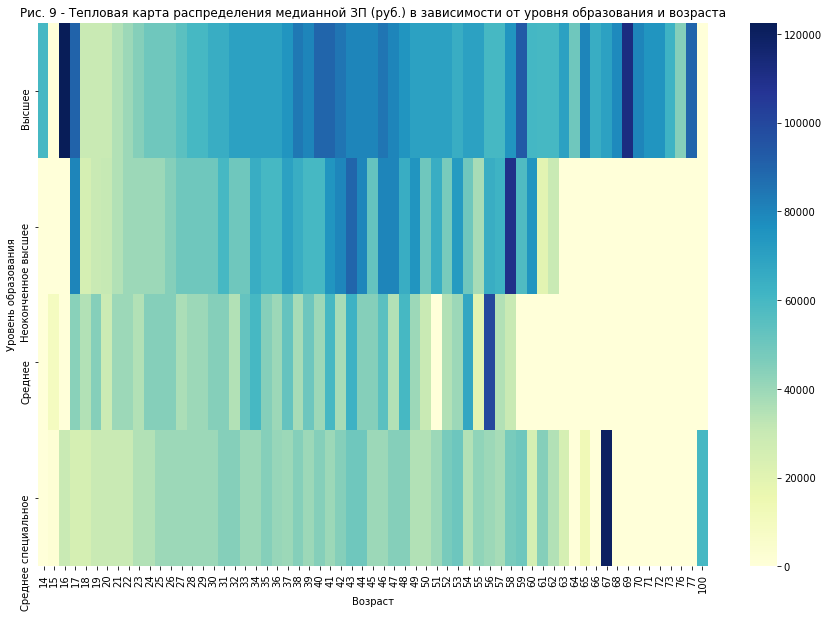

In [963]:
fig_9, axes_9 = plt.subplots(figsize=(15, 10))
heatmap = sns.heatmap(data=pivot_zp_age_education, ax=axes_9, cmap='YlGnBu')
heatmap.set_title('Рис. 9 - Тепловая карта распределения медианной ЗП (руб.) в зависимости от уровня образования и возраста');
heatmap.set_ylabel('Уровень образования')


При анализе рисунка 9 наблюдается очень много пустых значений. Больше всего их у соискателей со средним и неоконченным высшим образованием начиная от 58 лет. Скорее всего это связано с тем, что соискатель не уверен в том, что работодатель готов принять потенциального работника на его условиях, учитывая возраст и уровень квалификации. Беря во внимание вышесказанное, можно предположить, что соискатели с высшим образованием не испытывают неуверенности в себе, и охотнее указывают уровень желаемой ЗП.

Наибольшая интенсивность роста ЗП наблюдается у соискателей в Высшим образованием. 

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [964]:
data_frame['Опыт работы (год)'] = data_frame['Опыт работы (месяц)'].apply(lambda x: int(x/12))

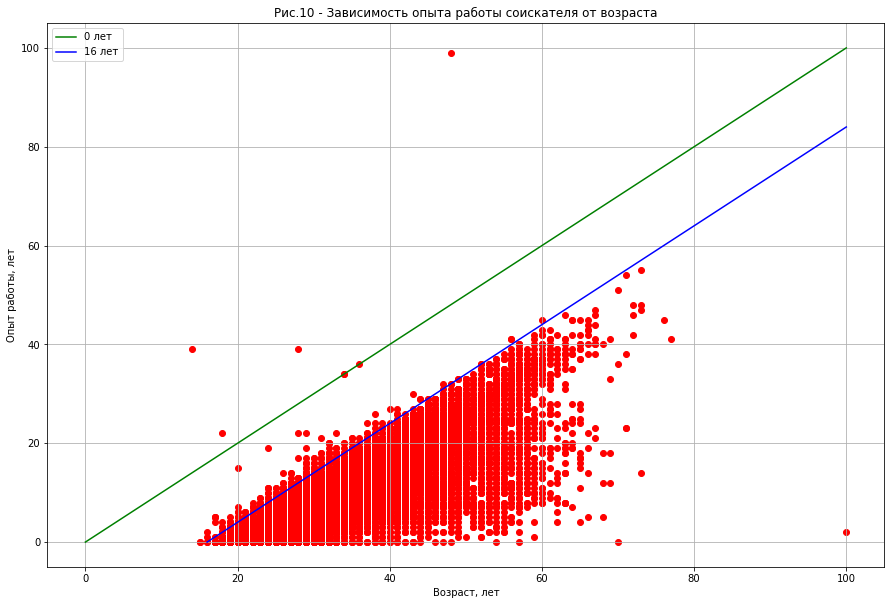

In [965]:
fig_10, axes_10 = plt.subplots(figsize=(15, 10))

axes_10.scatter(
    data_frame['Возраст'],
    data_frame['Опыт работы (год)'], 
    color='red',
)

axes_10.plot(
    [0, 100],
    [0, 100],
    color='green',
    label='0 лет'
)
axes_10.plot(
    [16, 100],
    [0, 84],
    color='blue',
    label='16 лет'
)

axes_10.set_title('Рис.10 - Зависимость опыта работы соискателя от возраста')
axes_10.set_xlabel("Возраст, лет")
axes_10.set_ylabel("Опыт работы, лет")
axes_10.legend()
axes_10.grid()
plt.show()

In [966]:
data_frame = data_frame.drop('Опыт работы (год)', axis=1)

Анализируя рисунок 10 можно увидеть, что количество аномальных точек (лежащих выше зеленой линии) составляет 4 шт.

Также можно увидеть, что облако точек имеет вид близкий к прямоугольному треугольнику. "Гипотенуза" примерно совпадает со значением возраста (синяя линия) 15-18 лет, это говороит о том, что соискатели начали свою профессиональную деятельность с 15-18 лет. 

Для диапазона возрастов 16-45 лет можно наблюдать, что достаточно много точек находятся выше синей линии. Это говорит о том, что, возможно, соискатель начал работать во время обучения (не полный рабочий день, по совместительству). 
Начиная приблизительно с 45 лет "выпадающие" точки наблюдаются реже, вероятно это связано с тем, что раньше не очень часто практиковалась работа по совместительству.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [967]:
dbl = data_frame[data_frame.duplicated(subset=data_frame.columns)]
print(f'Число дубликатов - {dbl.shape[0]} шт.')

Число дубликатов - 155 шт.


In [968]:
data_frame = data_frame.drop_duplicates()

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [969]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44589 entries, 0 to 44743
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44589 non-null  object 
 1   Опыт работы                      44589 non-null  object 
 2   Последнее/нынешнее место работы  44589 non-null  object 
 3   Последняя/нынешняя должность     44589 non-null  object 
 4   Обновление резюме                44589 non-null  object 
 5   Авто                             44589 non-null  object 
 6   Образование                      44589 non-null  object 
 7   Пол                              44589 non-null  object 
 8   Возраст                          44589 non-null  int64  
 9   Опыт работы (месяц)              44589 non-null  float64
 10  Город                            44589 non-null  object 
 11  Готовность к переезду            44589 non-null  bool   
 12  Готовность к коман

In [970]:
null_data = data.isnull().sum()
null_data

ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
опыт превышает возраст               0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [971]:
data_frame = data_frame.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
data_frame['Опыт работы (месяц)'] = data['Опыт работы (месяц)'].fillna(data_frame['Опыт работы (месяц)'].median())
print(round(data_frame['Опыт работы (месяц)'].mean(), 2))

114.34


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [972]:
outliers = data_frame[(data_frame['ЗП (руб)'] > 1e6) | (data_frame['ЗП (руб)'] < 1e3)]
data_frame = data_frame.drop(outliers.index)
print(outliers.shape[0])

89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [973]:
outliers = data_frame[data_frame['Опыт работы (месяц)']/12 >= data_frame['Возраст']]
data_frame = data_frame.drop(outliers.index)
print(outliers.shape[0])

7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**? В какую сторону **асимметрично логарифмическое распределение**? Найдите выбросы с помощью **метода z-отклонения** и удалите их из данных, используйте логарифмический масштаб, сделайте **послабление на 1 сигму (возьмите 4 сигмы)** в сторону, противоположную асимметрии. 

In [974]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [975]:
outliers, data = outliers_z_score_mod(data, 'Возраст', left=3,  right=4, log_scale=True)
print(outliers.shape[0])

4
